In [ ]:
%cd ..
from pathlib import Path
import json
from itertools import zip_longest
from py_markdown_table.markdown_table import markdown_table

# Results visualisation notebook

Use this notebook to visualise results generated from `scripts/run_eval.py`. Set the following variables:

In [2]:
RESULTS_FILE = Path('models/eval_test')

Load results

In [3]:
with open(RESULTS_FILE.with_suffix(".json"), "r") as f:
    results = json.load(f)

In [4]:
# Utilities functions
def filt(lbl): return [results[id].get(lbl, "") for id in results.keys()]
def repr(m, dp=2, p='+'):#r'\textpm'
    return rf"{str(round(m[0], dp)).lstrip('0')}{p} {str(round(m[1], dp)).lstrip('0')}" if (m is not None and m != "") else ""

Clean results

In [6]:
titles, metrics, metrics_init = filt('title'), filt('metrics'), filt('metrics_init')

titles = ["No learning"] + titles
metrics = [metrics_init[0]] + metrics #0 here arbitrary as all the same

In [11]:
table = [{
    "Method": title,
    "metric1": repr(metric[0], 2),
    "metric2": repr(metric[1], 3),
} for title, metric in zip_longest(titles, metrics)]

Print markdown table

In [12]:
print(markdown_table(table).set_params(row_sep="markdown").get_markdown())

```|   Method  |  metric1 |  metric2 |
|-----------|----------|----------|
|No learning|11.1+ 2.31| .227+ .09|
| Supervised|19.7+ 2.55|.543+ .114|```


Print latex table

In [14]:
for m in table:
    print(rf'{m["Method"]} & {m["metric1"]} & {m["metric2"]} \\')

No learning & 11.1+ 2.31 & .227+ .09 \\
Supervised & 19.7+ 2.55 & .543+ .114 \\


Load reconstructions

In [28]:
import numpy as np
import torch
import deepinv as dinv

data = np.load(RESULTS_FILE.with_suffix(".npz"))

def get_data(k, rows=[]):
    vis = data[k]
    res = data[k + "_result"]
    vis = torch.tensor(vis)#.clamp(vis, -5, 5)[..., 128:512-128, :] #optional cropping and clamping

    k = k.replace("x", "x (GT)") #optional prettify titles

    return k, vis[rows], res

def _plot_images(*labels, rows=[0], **kwargs):
    titles, xs, results = list(zip(*[get_data(k, rows=rows) for k in labels]))
    return dinv.utils.plot_inset(
        xs, 
        titles=titles,
        figsize=(2*len(labels), 2*len(xs[0])),
        show=False,
        labels=results,
        **kwargs
    )

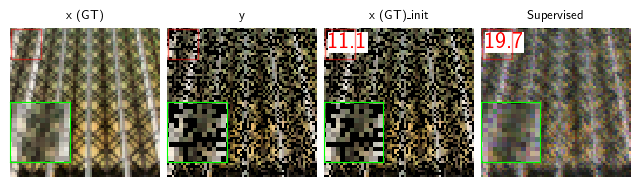

In [29]:
#| column: screen
#| out-width: 100%

_plot_images("x", "y", "x_init", "Supervised", save_fn=f"results/{RESULTS_FILE.name}.png", dpi=600)